In [2]:
#Dataset 1: https://www.kaggle.com/ananthu017/california-wildfire-incidents-20132020

,Unnamed: 0,Unnamed: 0.1,index,Name,Lat,Lon,Date
0,0,0,59,241 Fire,33.762600,-117.727400,7/13/15
1,1,1,73,3-11 Fire,41.292260,-121.172117,7/23/15
2,2,2,74,3-12 Fire,40.856422,-121.101623,7/23/15
3,3,3,113,36 Fire,40.350687,-121.778680,8/8/15
4,4,4,93,Advance Fire,36.498450,-118.900900,7/30/15


In [6]:
# packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
df = pd.read_csv('California_Fire_Incidents.csv')
df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


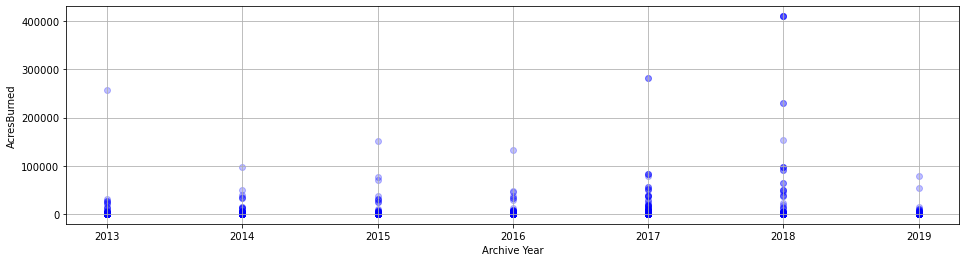

In [8]:
# plot Acres Burned vs Year
plt.figure(figsize=(16,4))
plt.scatter(df.ArchiveYear, df.AcresBurned, color='blue', alpha=0.25)
plt.xlabel('Archive Year')
plt.ylabel('AcresBurned')
plt.grid()
plt.show()

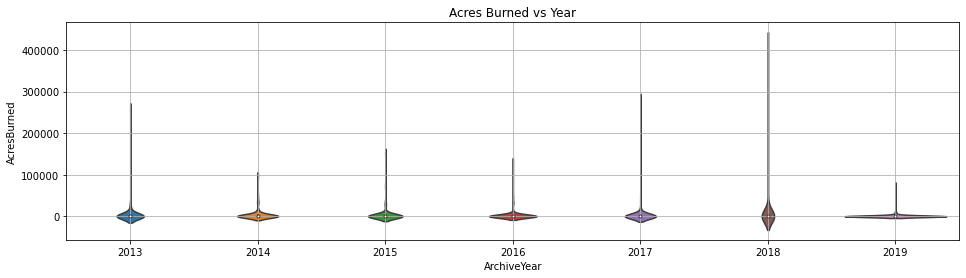

In [9]:
# same data visualized as violin plot
plt.figure(figsize=(16,4))
sns.violinplot(x='ArchiveYear', y='AcresBurned', data=df)
plt.grid()
plt.title('Acres Burned vs Year')
plt.show()

In [13]:
# acres burned - aggregate by year
acres_sum = df.groupby(by='ArchiveYear').AcresBurned.sum()
acres_sum

ArchiveYear
2013     527745.0
2014     448715.0
2015     574503.0
2016     505927.0
2017    1793915.0
2018    3358049.0
2019     285708.0
Name: AcresBurned, dtype: float64

In [29]:
pd.DataFrame(acres_sum)

,AcresBurned
ArchiveYear,
2013,527745.0
2014,448715.0
2015,574503.0
2016,505927.0
2017,1793915.0
2018,3358049.0
2019,285708.0


In [34]:
# number of fires - aggregate by year
fires_count = df.groupby(by='ArchiveYear').UniqueId.count()
fires_count

ArchiveYear
2013    162
2014    117
2015    152
2016    185
2017    438
2018    316
2019    266
Name: UniqueId, dtype: int64

In [35]:
pd.DataFrame(fires_count)

,UniqueId
ArchiveYear,
2013,162
2014,117
2015,152
2016,185
2017,438
2018,316
2019,266


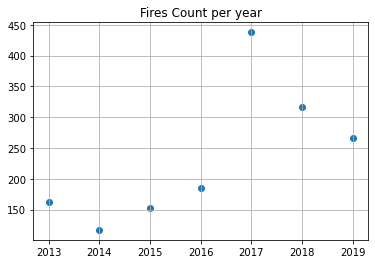

In [36]:
plt.scatter(fires_count.index, fires_count)
plt.grid()
plt.title('Fires Count per year')
plt.show()

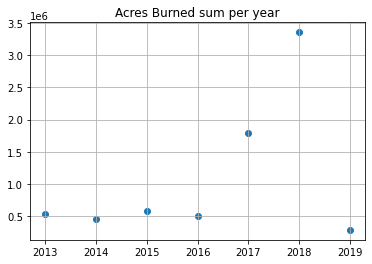

In [14]:
plt.scatter(acres_sum.index, acres_sum)
plt.grid()
plt.title('Acres Burned sum per year')
plt.show()

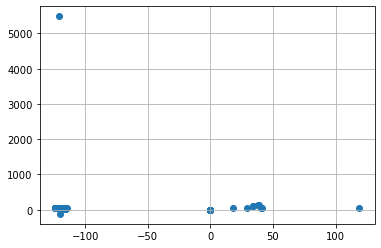

In [15]:
# check coordinates; there are quite a few unrealistic ones
plt.scatter(df.Longitude, df.Latitude)
plt.grid()
plt.show()

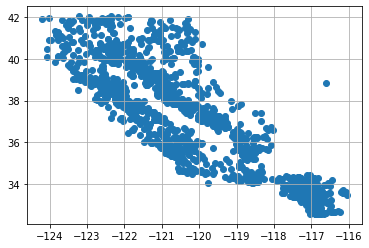

In [16]:
# remove those rows having unrealistic coordinates
df_select = df[df.Longitude<-115]
df_select = df_select[(df_select.Latitude<44) & (df_select.Latitude > 30)]
plt.scatter(df_select.Longitude, df_select.Latitude)
plt.grid()
plt.show()

In [18]:
# ok still one outlier in Nevada, let's get rid of that too
outlier = df_select[df_select.CanonicalUrl=='/incidents/2013/8/6/tram-fire/']

In [19]:
print('Outlier Lon/Lat:', outlier.Longitude, outlier.Latitude)

Outlier Lon/Lat: 113   -116.61
Name: Longitude, dtype: float64 113    38.838
Name: Latitude, dtype: float64


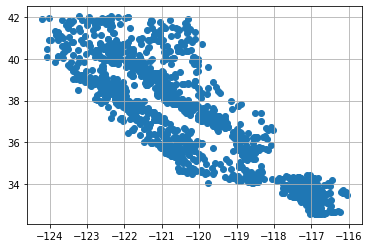

In [20]:
df_select = df_select[df_select.CanonicalUrl!='/incidents/2013/8/6/tram-fire/']
plt.scatter(df_select.Longitude, df_select.Latitude)
plt.grid()
plt.show()

In [23]:
!pip install folium

     |████████████████████████████████| 94 kB 4.0 MB/s eta 0:00:011


In [25]:
import folium
from folium.plugins import HeatMap

In [58]:
# interactive map 2013 - 2019

zoom_factor = 5 # inital map size
radius_scaling = 50 # scaling of bubbles

my_map_1 = folium.Map(location=[36,-120], zoom_start=zoom_factor)

for i in range(0,df_select.shape[0]):
   folium.Circle(
      location=[df_select.iloc[i]['Latitude'], df_select.iloc[i]['Longitude']],
      radius=np.sqrt(df_select.iloc[i]['AcresBurned'])*radius_scaling,
      color='red',
      popup='CanonicalUrl:' + df_select.iloc[i]['CanonicalUrl'] + ' - Year:' + str(int(df_select.iloc[i]['ArchiveYear'])) + ' - Acres Burned:' 
      + str(df_select.iloc[i]['AcresBurned']),
      fill=True,
      fill_color='red'
   ).add_to(my_map_1)

my_map_1 # display

In [ ]:
# Dataframe 2: 

In [1]:
import os, glob
import pandas as pd

#path = "/home/user/data/"
path = "/Users/nataliavelasquez/Dropbox/My Mac (Natalias-MacBook-Pro.local)/Documents/Data_Bootcamp/Final_Project/Natalia - Air Pollution"

all_files = glob.glob(os.path.join(path, "cali_*_fire_points.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv( "merged.csv")

In [39]:
df2 = pd.read_csv('merged.csv')
df2.head()

,Unnamed: 0,Unnamed: 0.1,index,Name,Lat,Lon,Date
0,0,0,59,241 Fire,33.762600,-117.727400,7/13/15
1,1,1,73,3-11 Fire,41.292260,-121.172117,7/23/15
2,2,2,74,3-12 Fire,40.856422,-121.101623,7/23/15
3,3,3,113,36 Fire,40.350687,-121.778680,8/8/15
4,4,4,93,Advance Fire,36.498450,-118.900900,7/30/15


In [53]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [56]:

df2['year'] = df2['Date'].dt.year
df2.head()

,Unnamed: 0,Unnamed: 0.1,index,Name,Lat,Lon,Date,year
0,0,0,59,241 Fire,33.762600,-117.727400,2015-07-13,2015
1,1,1,73,3-11 Fire,41.292260,-121.172117,2015-07-23,2015
2,2,2,74,3-12 Fire,40.856422,-121.101623,2015-07-23,2015
3,3,3,113,36 Fire,40.350687,-121.778680,2015-08-08,2015
4,4,4,93,Advance Fire,36.498450,-118.900900,2015-07-30,2015


In [57]:
# number of fires - aggregate by year
fires_count1 = df2.groupby(by='year').Name.count()
df_count = pd.DataFrame(fires_count1)
df_count.head()

,Name
year,
2015,96
2016,154
2017,429
2018,301
2019,262


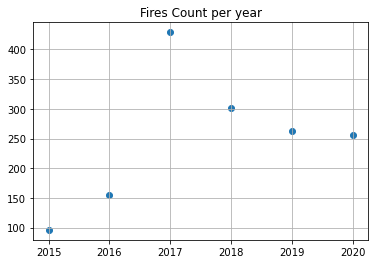

In [59]:
plt.scatter(df_count.index, df_count)
plt.grid()
plt.title('Fires Count per year')
plt.show()